<a href="https://colab.research.google.com/github/anutitto/dissertation/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285397 sha256=65bac39073d865a5a19b13082aa898757f4a5998aeac4e9ea44092c39f2c4df7
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


root
 |-- Time: integer (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double (null

<ipython-input-2-76aaebf86fef>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = pandas_df.corr()


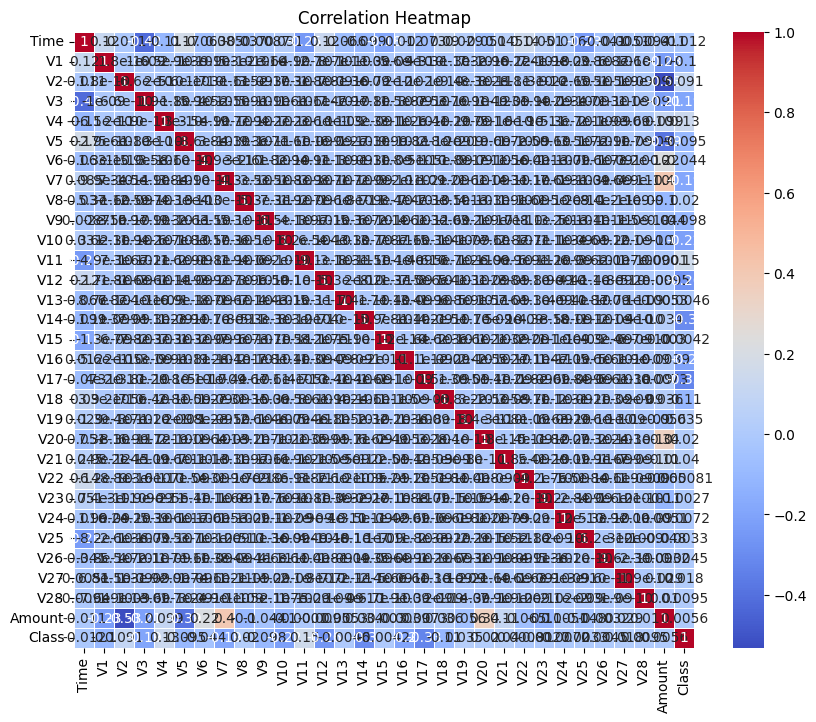

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,isnan,when,count
spark = SparkSession.builder.appName("fraud_detection_financialtransactions").getOrCreate()
df = spark.read.csv('dataset.csv', header=True, inferSchema=True)
df.printSchema()
df.summary().show()
df2 = df.select([count(when(col(c).contains('Unknown') | \
                            col(c).contains('N/A') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c
                           )).alias(c)
                    for c in df.columns])
df2.show()
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
feature_cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount','Class']

assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_assembled = assembler.transform(df)
pandas_df = df_assembled.toPandas()
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = pandas_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



In [ ]:
from pyspark.sql.functions import desc, row_number, monotonically_increasing_id
from pyspark.sql.window import Window

df_new = df.withColumn('id', row_number().over(Window.orderBy(monotonically_increasing_id())))
df_new.show()

+----+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+------+-----+---+
|Time|       V1|       V2|       V3|       V4|       V5|       V6|       V7|       V8|       V9|      V10|      V11|      V12|      V13|      V14|      V15|      V16|      V17|      V18|      V19|      V20|      V21|      V22|      V23|      V24|      V25|      V26|      V27|      V28|Amount|Class| id|
+----+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+------+-----+---+
|   0|-1.359807|-0.072781| 2.536347| 1.378155|-0.338321| 0.462388| 0.239599| 0.098698| 0

In [ ]:
df_new=df_new.select('id','Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','Amount','Class')
df_new.show()

+---+----+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+------+-----+
| id|Time|       V1|       V2|       V3|       V4|       V5|       V6|       V7|       V8|       V9|      V10|      V11|      V12|      V13|      V14|      V15|      V16|      V17|      V18|      V19|      V20|      V21|      V22|      V23|      V24|      V25|      V26|      V27|Amount|Class|
+---+----+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+------+-----+
|  1|   0|-1.359807|-0.072781| 2.536347| 1.378155|-0.338321| 0.462388| 0.239599| 0.098698| 0.363787| 0.090794|  -0.551

In [ ]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler().setInputCols\
            (df_new.columns).setOutputCol("features")
transformed = assembler.transform(df_new)
scaler = MinMaxScaler(inputCol="features",\
         outputCol="scaledFeatures")
scalerModel =  scaler.fit(transformed.select("features"))
scaledData = scalerModel.transform(transformed)
scaledData.show()

+---+----+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+------+-----+--------------------+--------------------+
| id|Time|       V1|       V2|       V3|       V4|       V5|       V6|       V7|       V8|       V9|      V10|      V11|      V12|      V13|      V14|      V15|      V16|      V17|      V18|      V19|      V20|      V21|      V22|      V23|      V24|      V25|      V26|      V27|Amount|Class|            features|      scaledFeatures|
+---+----+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+------+-----+--------------------+--------------

In [ ]:
def extract(row):
    return tuple(row.scaledFeatures.toArray().tolist())
final_data = scaledData.select("scaledFeatures").rdd\
               .map(extract).toDF(df_new.columns)
final_data.show()
print(final_data.count(),len(final_data.columns))
final_data=final_data.toPandas()

+--------------------+--------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+-------------------+--------------------+-----+
|                  id|                Time|                V1|                V2|                V3|                 V4|                V5|                 V6|                 V7|                V8|                 V9|               V10|                V11|               V12|                V13|               V14|                V15|                V16|               V17|               V18|          

In [ ]:
import pandas as pd
final_data.to_csv("dataset_final.csv",index=False)

[0.39706338 0.756945   0.76222087 0.76366737 0.7669567  0.78572657
 0.78613794 0.78699282 0.78726346 0.78804553 0.79487009 0.79728821
 0.81484231 0.82160001 0.84988006 0.85482993 0.877139   0.88083892
 0.88374073 0.89957468 0.91882933 0.91915037 0.9198184  0.9252792
 0.92568897 0.95742337 0.96150285 0.99106715 0.99133161 0.99178322
 1.        ]


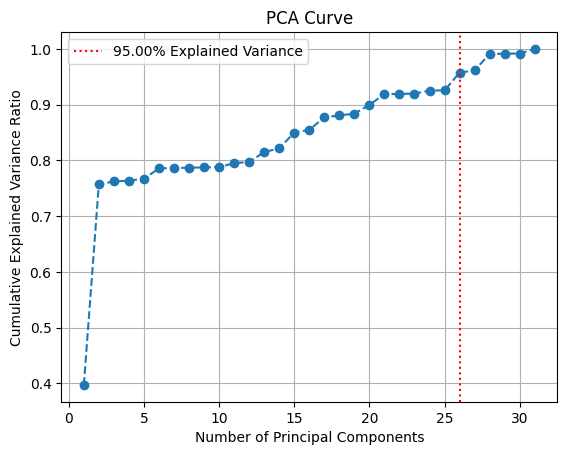

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data_reduce=pd.read_csv("dataset_final.csv")
principal_components=data_reduce.to_numpy()
desired_explained_variance_ratio = 0.95
explained_variance_ratio = np.var(principal_components, axis=0) / np.sum(np.var(principal_components, axis=0))
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(cumulative_explained_variance)
num_components = np.argmax(cumulative_explained_variance >= desired_explained_variance_ratio) + 1
selected_principal_components = principal_components[:num_components]
reduced_data = principal_components[:, :num_components]

# Plot the PCA curve
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axvline(x=num_components, color='red', linestyle=':', label=f'{desired_explained_variance_ratio*100:.2f}% Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Curve')
plt.grid(True)
plt.legend()
plt.show()
column_names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25']
reduced_data = pd.DataFrame(data=reduced_data,columns=column_names)
reduced_data.to_csv("reduced_data.csv",index=False)


In [ ]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
# define dataset
data_smote=pd.read_csv("reduced_data.csv")
y = data_reduce['Class']#dependent variable
X = data_smote#independent variable
smote = SMOTE()
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))
data_smote_new = pd.DataFrame(x_smote, columns=X.columns)
data_smote_new['Class'] = y_smote

Original dataset shape Counter({0.0: 284315, 1.0: 492})
Resample dataset shape Counter({0.0: 284315, 1.0: 284315})


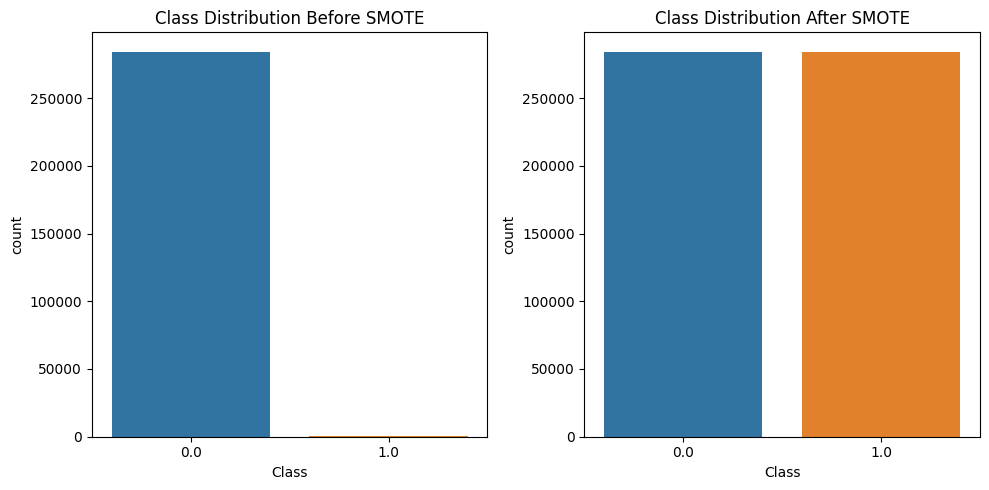

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(121)
g = sns.countplot(x='Class', data=data_reduce)
g.set_title('Class Distribution Before SMOTE')

plt.subplot(122)
g_smote = sns.countplot(x='Class', data=data_smote_new)
g_smote.set_title('Class Distribution After SMOTE')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X = data_smote_new.drop(["Class"],axis=1)
y = data_smote_new["Class"]
#create subset of the dataset
subset_size = 0.1
X_subset, _, y_subset, _ = train_test_split(X, y, train_size=subset_size, random_state=42)
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)
svc = SVC(C=1.0, random_state=42, kernel='linear')

# Fit the model
svc.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_predict = svc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.2f}")

# Get a classification report
print("Classification Report:")
print(classification_report(y_test, y_predict))

# Get a confusion matrix
print("Confusion Matrix:")
cm=confusion_matrix(y_test, y_predict)
print(cm)

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      5746
         1.0       0.98      0.89      0.94      5627

    accuracy                           0.94     11373
   macro avg       0.94      0.94      0.94     11373
weighted avg       0.94      0.94      0.94     11373

Confusion Matrix:
[[5655   91]
 [ 605 5022]]


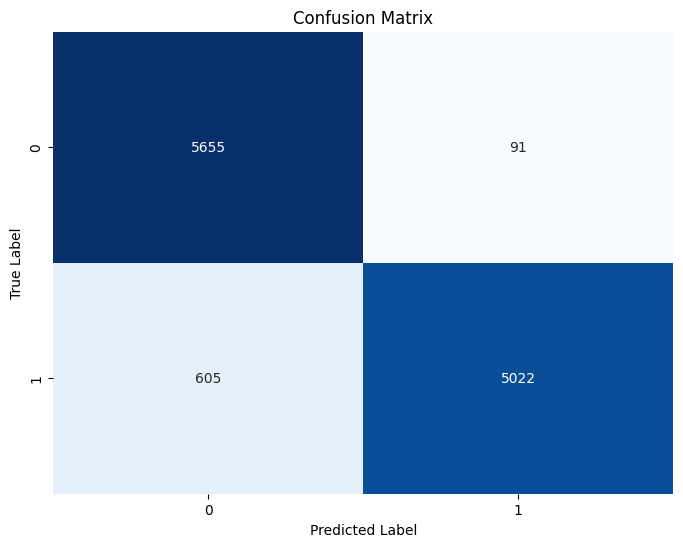

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_predict = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.2f}")

# Get a classification report
print("Classification Report:")
print(classification_report(y_test, y_predict))

# Get a confusion matrix
print("Confusion Matrix:")
cm_rf=confusion_matrix(y_test, y_predict)
print(cm_rf)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5746
         1.0       1.00      1.00      1.00      5627

    accuracy                           1.00     11373
   macro avg       1.00      1.00      1.00     11373
weighted avg       1.00      1.00      1.00     11373

Confusion Matrix:
[[5738    8]
 [  17 5610]]


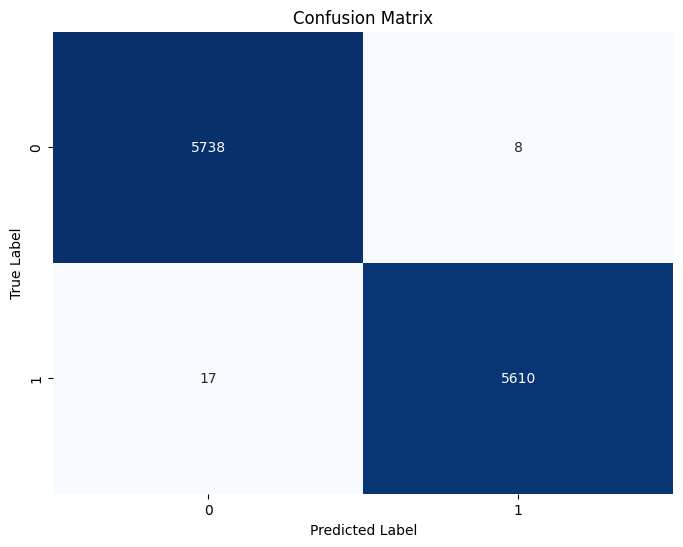

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
!pip install keras
!pip install pydot
!pip install graphviz



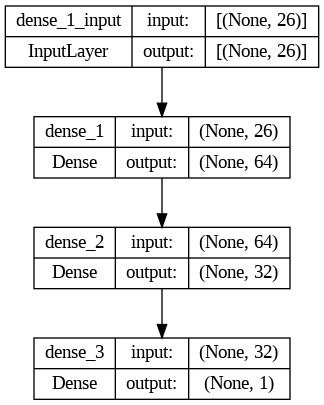

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import Accuracy
from keras.utils.vis_utils import plot_model
# Create the ANN model
ann_model = Sequential()
ann_model.add(Dense(64, activation='relu', input_dim=26,name='dense_1'))
ann_model.add(Dense(32, activation='relu',name='dense_2'))
ann_model.add(Dense(1, activation='sigmoid',name='dense_3'))

ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

plot_model(ann_model, to_file='ann_architecture.png', show_shapes=True, show_layer_names=True)

ann_model.fit(X_train, y_train, epochs=15, batch_size=35, validation_split=0.1)


In [ ]:
y_pred = ann_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
class_report = classification_report(y_test, y_pred)

print("Classification Report:\n", class_report)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

356/356 [==============================] - 1s 1ms/step
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      5746
         1.0       0.96      0.93      0.94      5627

    accuracy                           0.95     11373
   macro avg       0.95      0.95      0.95     11373
weighted avg       0.95      0.95      0.95     11373

Confusion Matrix:
 [[5537  209]
 [ 403 5224]]


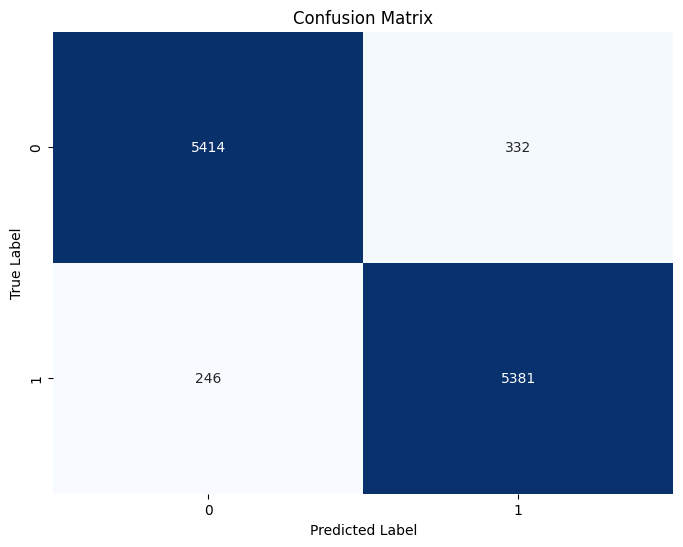

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()